In [45]:
import pandas as pd

base = pd.read_csv('base.csv')
detailed = pd.read_csv('detailed.csv')
cot = pd.read_csv('cot.csv')
few = pd.read_csv('few.csv')
df_list = [base, detailed, few, cot]
few['Log_Probability'] = pd.to_numeric(few['Log_Probability'])
cot['Log_Probability'] = pd.to_numeric(cot['Log_Probability'])
detailed['Log_Probability'] = pd.to_numeric(detailed['Log_Probability'])
base['Log_Probability'] = pd.to_numeric(base['Log_Probability'])

In [46]:
pubmed = pd.read_csv('pubmedqa-labeled.csv')
pubmed

,pubid,question,context,long_answer,final_decision
0,21645374,Do mitochondria play a role in remodelling lac...,{'contexts': array(['Programmed cell death (PC...,Results depicted mitochondrial dynamics in viv...,yes
1,16418930,Landolt C and snellen e acuity: differences in...,{'contexts': array(['Assessment of visual acui...,"Using the charts described, there was only a s...",no
2,9488747,"Syncope during bathing in infants, a pediatric...",{'contexts': array(['Apparent life-threatening...,"""Aquagenic maladies"" could be a pediatric form...",yes
3,17208539,Are the long-term results of the transanal pul...,{'contexts': array(['The transanal endorectal ...,Our long-term study showed significantly bette...,no
4,10808977,Can tailored interventions increase mammograph...,{'contexts': array(['Telephone counseling and ...,The effects of the intervention were most pron...,yes
...,...,...,...,...,...
995,8921484,Does gestational age misclassification explain...,"{'contexts': array(['After 34 weeks gestation,...",Gestational age misclassification is an unlike...,no
996,16564683,Is there any interest to perform ultrasonograp...,{'contexts': array(['To evaluate the accuracy ...,Sonography has no place in the diagnosis of un...,no
997,23147106,Is peak concentration needed in therapeutic dr...,{'contexts': array(['We analyzed the pharmacok...,These results suggest little need to use peak ...,no
998,21550158,Can autologous platelet-rich plasma gel enhanc...,{'contexts': array(['This investigation assess...,"The PRP group recorded reduced pain, swelling,...",yes


In [47]:
few['Answer']

0                                         \nAnswer: Yes.
1       Examiner: No, but it is obvious that the abil...
2      \nContext:Does moderate exercise improve baror...
3      \nAnswer: Yes. The comparison of baro-transabd...
4                               \nInterpretation: Maybe.
                             ...                        
995    \nAnswer: Yes. The previous studies showed tha...
996    Answer:Yes. There was a 50-60% chance of missi...
997    Context: 31 hospitalized patients with methici...
998    \nAnswer: Yes. The results clearly demonstrate...
999     Answer:Yes. These findings suggest that moder...
Name: Answer, Length: 1000, dtype: object

In [48]:
few.dtypes

Unnamed: 0           int64
Question            object
Answer              object
Log_Probability    float64
Accuracy              bool
Token_Length         int64
dtype: object

In [49]:
import math

def shannon_entropy(string):
    """Calculate the Shannon entropy of a string"""
    if not string:  # Check if the string is empty
        return 0  # Return 0 for empty strings

    freq = [str(string).count(c) / len(str(string)) for c in set(str(string))]
    entropy = -sum(f * math.log2(f) for f in freq if f != 0)  # Exclude zero frequencies

    return entropy

few['entropy'] = few['Answer'].apply(shannon_entropy)
cot['entropy'] = cot['Answer'].apply(shannon_entropy)
detailed['entropy'] = detailed['Answer'].apply(shannon_entropy)
base['entropy'] = base['Answer'].apply(shannon_entropy)


In [51]:
import matplotlib.pyplot as plt

averages = pd.DataFrame({
    'Dataset': ['base', 'detailed', 'cot', 'few-shot'],
    'Average Log Probability': [df['Log_Probability'].mean() for df in df_list],
    'Average Accuracy': [100*df['Accuracy'].mean() for df in df_list],
     'Average Token Length': [df['Token_Length'].mean() for df in df_list],
          'Average Entropy': [df['entropy'].mean() for df in df_list],
         'Median Entropy': [df['entropy'].median() for df in df_list],
    'Median Log Probability': [df['Log_Probability'].median() for df in df_list],
     'Median Token Length': [df['Token_Length'].median() for df in df_list],
})

averages

,Dataset,Average Log Probability,Average Accuracy,Average Token Length,Average Entropy,Median Entropy,Median Log Probability,Median Token Length
0,base,-0.501546,16.0,90.839,4.016281,4.256885,-0.443294,48.0
1,detailed,-0.546859,15.9,90.170,4.096361,4.280379,-0.492613,54.5
2,cot,-0.621641,16.6,73.508,3.973119,4.251865,-0.550453,46.0
3,few-shot,-0.599473,13.3,90.408,4.025114,4.275706,-0.520645,56.0


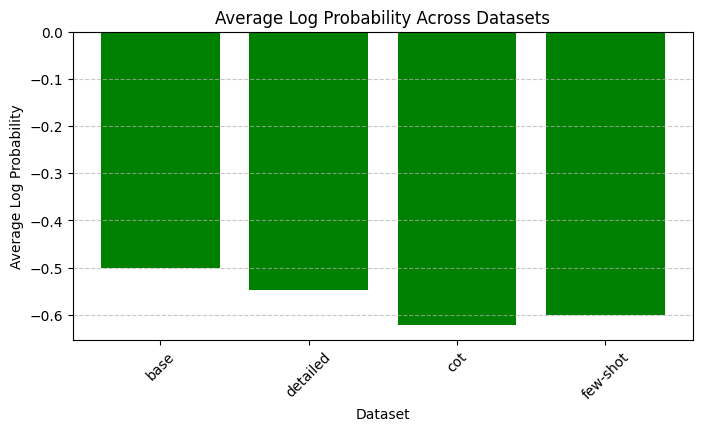

In [53]:
plt.figure(figsize=(8, 4))
plt.bar(averages['Dataset'], averages['Average Log Probability'], color='green')
plt.title('Average Log Probability Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Average Log Probability')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/var/folders/yn/wpx1g2g117z07vpq8_h3j_5r0000gn/T/ipykernel_35512/684552240.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dataset', y='Average Log Probability', data=averages, palette='viridis', ax=ax)


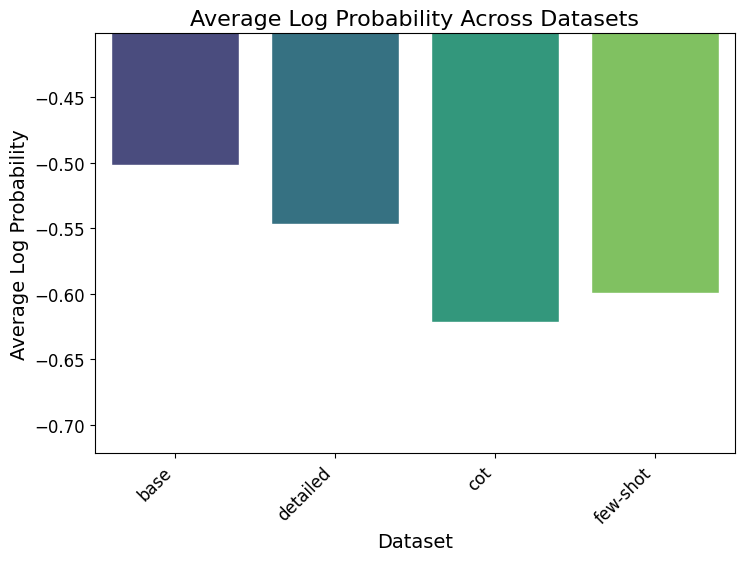

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font family and size
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 12

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(8, 6))

# Set the plot style
sns.set_style("darkgrid")

# Create the bar plot
sns.barplot(x='Dataset', y='Average Log Probability', data=averages, palette='viridis', ax=ax)

# Set the plot title and axis labels
ax.set_title('Average Log Probability Across Datasets', fontsize=16)
ax.set_xlabel('Dataset', fontsize=14)
ax.set_ylabel('Average Log Probability', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the y-axis limits to fit the data range
ax.set_ylim(min(averages['Average Log Probability']) - 0.1, max(averages['Average Log Probability']) + 0.1)

# Add some spacing between the plot and the axes
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9)

plt.show()

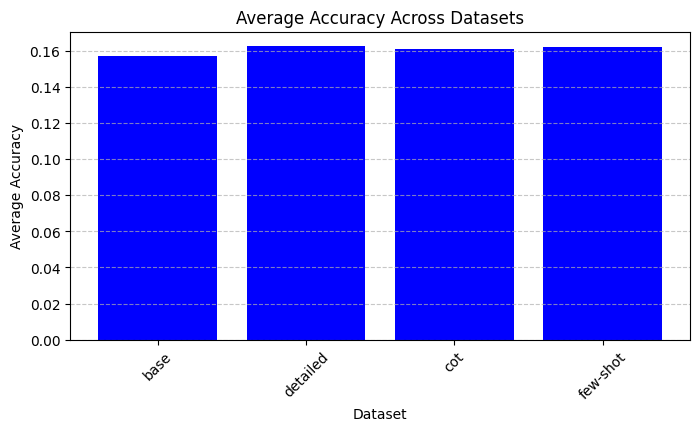

In [22]:
plt.figure(figsize=(8, 4))
plt.bar(averages['Dataset'], averages['Average Accuracy'], color='blue')
plt.title('Average Accuracy Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Average Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

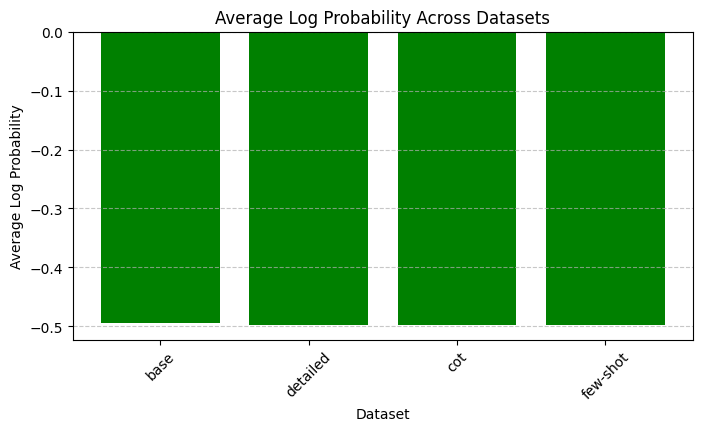

In [23]:
plt.figure(figsize=(8, 4))
plt.bar(averages['Dataset'], averages['Average Log Probability'], color='green')
plt.title('Average Log Probability Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Average Log Probability')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [24]:
import seaborn as sns

df = pd.concat([df1.assign(Dataset='1'), df2.assign(Dataset='2'), df3.assign(Dataset='3'), df4.assign(Dataset='4')])

# Assuming df is a combined DataFrame of all datasets if needed
# df = pd.concat([df1, df2, df3, df4])

# Calculate correlation matrix
corr_matrix = df[['token_length', 'accuracy', 'log_probability']].corr()

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation Matrix')
plt.show()

NameError: name 'df1' is not defined

In [25]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[['token_length', 'accuracy', 'log_probability']], alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

NameError: name 'df' is not defined

In [26]:
# Concatenate all dataframes with a dataset label

# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dataset', y='log_probability', data=df_all)
plt.title('Log Probability Distribution by Dataset')
plt.show()

# Repeat for 'accuracy' and 'token_length'

NameError: name 'df_all' is not defined

<Figure size 1200x600 with 0 Axes>

In [27]:
df[['log_probability', 'accuracy', 'token_length']].plot(kind='density', subplots=True, layout=(1, 3), sharex=False, figsize=(15, 4))
plt.suptitle('Density Plots of Variables')
plt.show()

NameError: name 'df' is not defined